# Predict COVID-19 Using Long Short Term Memory (LSTM)

https://github.com/NourozR/Stock-Price-Prediction-LSTM

## Data Pre-processing:
After converting the dataset to confirmed cases, it becomes one column data. This has been converted into two column time series data, 1st column consisting stock price of time t, and second column of time t+1. All values have been normalized between 0 and 1.

In [ ]:
import numpy as np
  

# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
        data_X, data_Y = [], []
        for i in range(len(dataset)-step_size):
                a = dataset[i:(i+step_size), 0]
                data_X.append(a)
                data_Y.append(dataset[i + step_size, 0])
        return np.array(data_X), np.array(data_Y)

# THIS FUNCTION CAN BE USED TO CREATE A TIME SERIES DATASET FROM ANY 1D ARRAY 

In [ ]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

def my_plot(x, y, fig_size=(12, 9), x_label='', y_label='', color='blue', step=1):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.plot(x, y, lw=2, color=color)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.xticks(x[::7], fontsize=14)    
    plt.text(x[-1], y[-1], "%d" %y[-1], va="bottom", ha="left", fontsize=14)
    step = 10 ** (len(str(max(y))) - 1)
    plt.yticks(range(0, max(y)//step*step+step+1, step), ['0']+[str(x) + "0k" for x in range(1, max(y)//step+step+1)], fontsize=14)
    
    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    return ax

    plt.show()


## Model:

Two sequential LSTM layers have been stacked together and one dense layer is used to build the RNN model using Keras deep learning library. Since this is a regression task, 'linear' activation has been used in final layer.


['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20']
1/22/20 2/28/20
(29, 1) (11, 1)
Train on 28 samples
Epoch 1/400
28/28 - 2s - loss: 0.2269
Epoch 2/400
28/28 - 0s - loss: 0.1971
Epoch 3/400
28/28 - 0s - loss: 0.1687
Epoch 4/400
28/28 - 0s - loss: 0.1442
Epoch 5/400
28/28 - 0s - loss: 0.1181
Epoch 6/400
28/28 - 0s - loss: 0.1028
Epoch 7/400
28/28 - 0s - loss: 0.0931
Epoch 8/400
28/28 - 0s - loss: 0.0834
Epoch 9/400
28/28 - 0s - loss: 0.0753
Epoch 10/400
28/28 - 0s - loss: 0.0799
Epoch 11/400
28/28 - 0s - loss: 0.0649
Epoch 12/400
28/28 - 0s - loss: 0.0669
Epoch 13/400
28/28 - 0s - lo

Epoch 196/400
28/28 - 0s - loss: 0.0041
Epoch 197/400
28/28 - 0s - loss: 0.0048
Epoch 198/400
28/28 - 0s - loss: 0.0040
Epoch 199/400
28/28 - 0s - loss: 0.0062
Epoch 200/400
28/28 - 0s - loss: 0.0055
Epoch 201/400
28/28 - 0s - loss: 0.0050
Epoch 202/400
28/28 - 0s - loss: 0.0031
Epoch 203/400
28/28 - 0s - loss: 0.0097
Epoch 204/400
28/28 - 0s - loss: 0.0028
Epoch 205/400
28/28 - 0s - loss: 0.0068
Epoch 206/400
28/28 - 0s - loss: 0.0028
Epoch 207/400
28/28 - 0s - loss: 0.0045
Epoch 208/400
28/28 - 0s - loss: 0.0037
Epoch 209/400
28/28 - 0s - loss: 0.0060
Epoch 210/400
28/28 - 0s - loss: 0.0051
Epoch 211/400
28/28 - 0s - loss: 0.0047
Epoch 212/400
28/28 - 0s - loss: 0.0034
Epoch 213/400
28/28 - 0s - loss: 0.0049
Epoch 214/400
28/28 - 0s - loss: 0.0026
Epoch 215/400
28/28 - 0s - loss: 0.0061
Epoch 216/400
28/28 - 0s - loss: 0.0051
Epoch 217/400
28/28 - 0s - loss: 0.0057
Epoch 218/400
28/28 - 0s - loss: 0.0035
Epoch 219/400
28/28 - 0s - loss: 0.0044
Epoch 220/400
28/28 - 0s - loss: 0.0026


(28, 1, 1) (10, 1, 1)
(28, 1) (10, 1)
Train RMSE: 2585.96
Test RMSE: 2963.35
(38, 1) (38, 1)


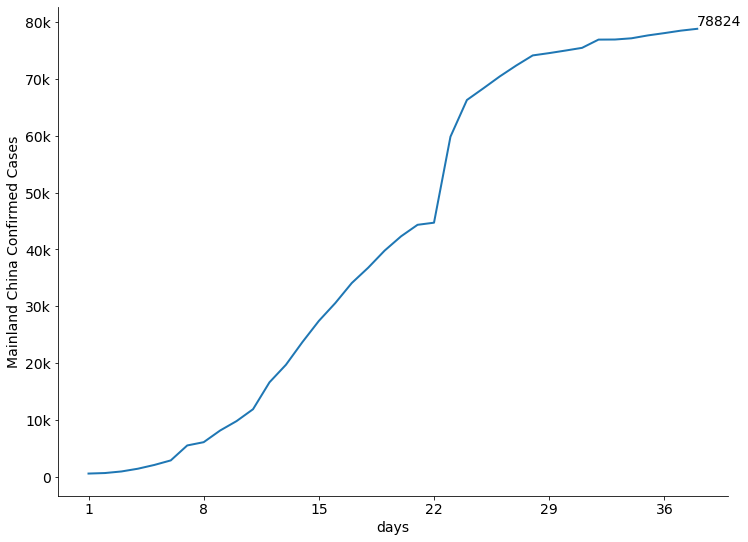

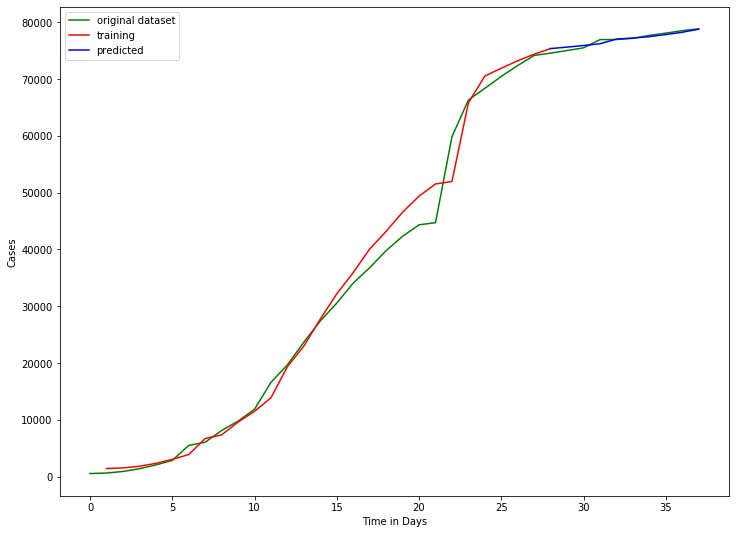

Last Day Value: 78754.1640625
Next Day Value: 74175.6875


/home/lei/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:153: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/home/lei/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:154: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


In [31]:
# IMPORTING IMPORTANT LIBRARIES
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
# import preprocessing

# FOR REPRODUCIBILITY
np.random.seed(7)

#parameters
epochs = 400

# IMPORTING DATASET 
confirm = '../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

with open(confirm, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')

    for i, row in enumerate(csvreader):
        # print(', '.join(row))
        
        if i == 0:
            heading = row
            print(heading)
            
            print(row[4], row[-1])
            num_days = len(row) - 4
            china_confirm = [0 for i in range(num_days)]
            rest_confirm  = [0 for i in range(num_days)]
        else:
            if row[1] == 'Mainland China':
                for j in range(num_days):
                    china_confirm[j] += int(row[j+4])
            else:
                for j in range(num_days):
                    rest_confirm[j] += int(row[j+4])

#dataset = china_confirm
dataset = [china_confirm[i] + rest_confirm[i] for i in range(len(china_confirm))]

                  
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

# PLOTTING ALL INDICATORS IN ONE PLOT
my_plot(obs, china_confirm, x_label='days', y_label='Mainland China Confirmed Cases', color=tableau20[0])


# PREPARATION OF TIME SERIES DATASE
dataset = np.reshape(dataset, (len(dataset),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# TRAIN-TEST SPLIT
n_train = 28 # int(len(dataset) * 0.6)
n_test = len(dataset) - n_train
train, test = dataset[0:n_train+1,:], dataset[n_train-1:len(dataset),:]


print(train.shape, test.shape)

# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train, 1)
testX, testY = new_dataset(test, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

# LSTM MODEL
#model = Sequential()
#model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(LSTM(16))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

# LSTM MODEL
model = Sequential()
model.add(LSTM(8, input_shape=(1, step_size), return_sequences = True,
          kernel_initializer='random_uniform',
          bias_initializer='zeros'))
model.add(Dropout(0.25))
model.add(LSTM(4, input_shape=(8, 4), kernel_initializer='random_uniform', bias_initializer='zeros'))
#model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)

print(trainX.shape, testX.shape)

# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

print(trainPredict.shape, testPredict.shape)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)-2:len(dataset), :] = testPredict

# DE-NORMALIZING MAIN DATASET 
dataset = scaler.inverse_transform(dataset)

print(trainPredictPlot.shape, testPredictPlot.shape)

# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(china_confirm, 'g', label = 'original dataset')
ax.plot(trainPredictPlot, 'r', label = 'training')
ax.plot(testPredictPlot, 'b', label = 'predicted')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('Cases')
plt.show()

# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Day Value:", np.asscalar(last_val))
print("Next Day Value:", np.asscalar(last_val*next_val))
# print(np.append(last_val, next_val))
